In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Data Preprocessing:

In [2]:
# Load the dataset
df = pd.read_csv("D://Talent Battle Internship//training.1600000.processed.noemoticon.csv", encoding="latin1", header=None)

In [3]:
# Assign column names
df.columns = ["target", "id", "date", "flag", "user", "text"]

In [4]:
df

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [5]:
# Display basic information about the dataset
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   id      1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB
None


In [7]:
# Display the first few rows of the dataset
print("\nFirst Few Rows:")
df.head()


First Few Rows:


,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [8]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
target    0
id        0
date      0
flag      0
user      0
text      0
dtype: int64


In [9]:
# Summary statistics for numerical features
print("\nSummary Statistics for Numerical Features:")
print(df.describe())


Summary Statistics for Numerical Features:
             target            id
count  1.600000e+06  1.600000e+06
mean   2.000000e+00  1.998818e+09
std    2.000001e+00  1.935761e+08
min    0.000000e+00  1.467810e+09
25%    0.000000e+00  1.956916e+09
50%    2.000000e+00  2.002102e+09
75%    4.000000e+00  2.177059e+09
max    4.000000e+00  2.329206e+09


In [10]:
# Distribution of target classes
print("\nTarget Class Distribution:")
print(df['target'].value_counts())


Target Class Distribution:
target
0    800000
4    800000
Name: count, dtype: int64


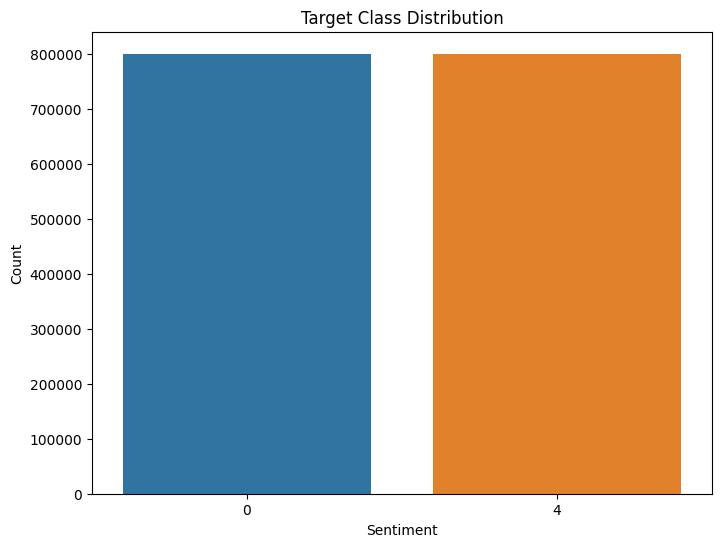

In [11]:
# Visualizing target class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df)
plt.title('Target Class Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

### 2. Text Preprocessing:

In [13]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Function to count number of words in each review
def count_words(text):
    return len(text.split())

In [14]:
# Text preprocessing function
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    # Remove special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)
    # Apply stemming
    stemmer = PorterStemmer()
    text = ' '.join(stemmer.stem(word) for word in text.split())
    return text

In [15]:
# Example usage
sample_text = "It's a beautiful day! Let's go for a walk."
processed_text = preprocess_text(sample_text)
print("Original Text:", sample_text)
print("Processed Text:", processed_text)

Original Text: It's a beautiful day! Let's go for a walk.
Processed Text: beauti day let go walk


### 3. Exploratory Data Analysis (EDA):

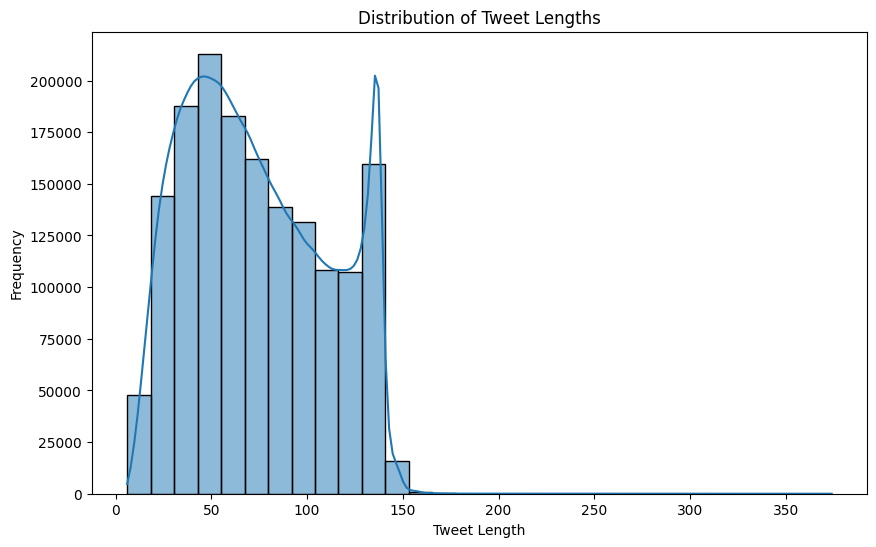

In [16]:
# Distribution of tweet lengths
df['tweet_length'] = df['text'].apply(lambda x: len(x))
plt.figure(figsize=(10, 6))
sns.histplot(df['tweet_length'], bins=30, kde=True)
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.show()

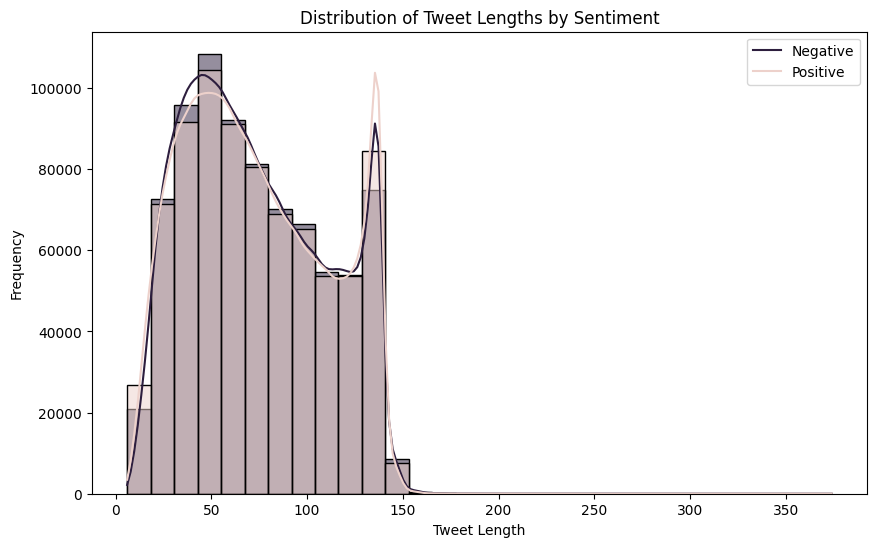

In [17]:
# Distribution of tweet lengths by sentiment
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='tweet_length', hue='target', bins=30, kde=True, alpha=0.5)
plt.title('Distribution of Tweet Lengths by Sentiment')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.legend(['Negative', 'Positive'])
plt.show()

In [18]:
# Word cloud for positive and negative tweets
from wordcloud import WordCloud

# Separate positive and negative tweets
positive_tweets = df[df['target'] == 4]['text']
negative_tweets = df[df['target'] == 0]['text']

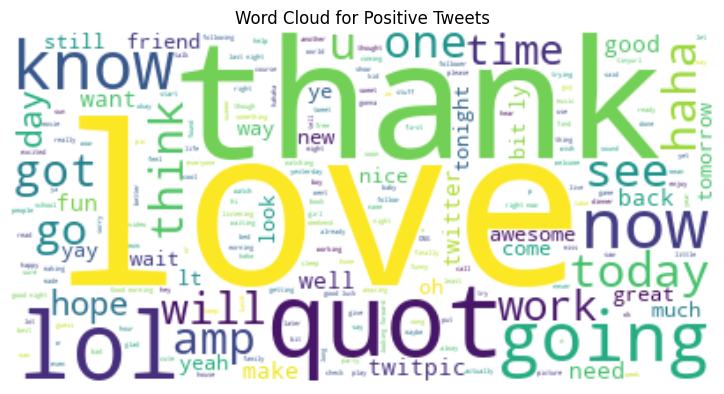

In [19]:
# Generate word clouds
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
wordcloud_positive = WordCloud(background_color='white').generate(' '.join(positive_tweets))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud for Positive Tweets')
plt.axis('off')
plt.show()

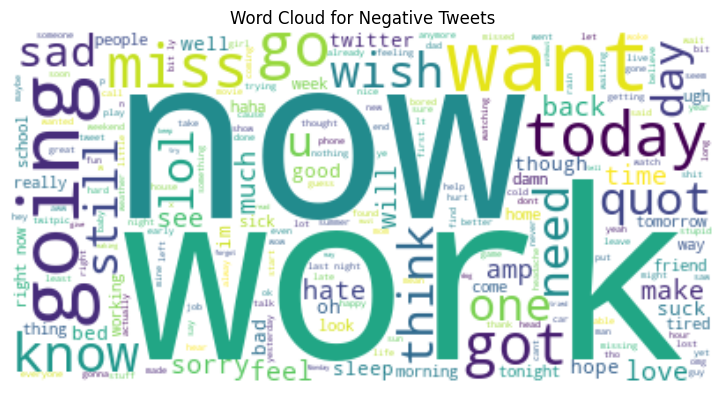

In [20]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 2)
wordcloud_negative = WordCloud(background_color='white').generate(' '.join(negative_tweets))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud for Negative Tweets')
plt.axis('off')
plt.show()

### 4. Feature Extraction:

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the text data
X_tfidf = tfidf_vectorizer.fit_transform(df['text'])

# Convert target labels to numerical format
y = df['target'].replace({4: 1})

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

### 5. Model Building:

In [22]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Initialize the Multinomial Naive Bayes classifier
mnb_classifier = MultinomialNB()

# Train the classifier
mnb_classifier.fit(X_train, y_train)

# Predictions on the test set
mnb_preds = mnb_classifier.predict(X_test)

# Evaluate accuracy
mnb_accuracy = accuracy_score(y_test, mnb_preds)
print("Multinomial Naive Bayes Accuracy:", mnb_accuracy)

Multinomial Naive Bayes Accuracy: 0.768971875


### 6. Deep Learning Models:

In [41]:
from keras.models import Sequential
from keras.layers import Dense

# Initialize FFNN model
ffnn_model = Sequential([
    Dense(128, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
ffnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
ffnn_history = ffnn_model.fit(X_train.toarray(), y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on test set
ffnn_loss, ffnn_accuracy = ffnn_model.evaluate(X_test.toarray(), y_test)
print("Feedforward Neural Network Accuracy:", ffnn_accuracy)

C:\Users\Sumit\anaconda3\envs\IS2-DL\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
32000/32000 ━━━━━━━━━━━━━━━━━━━━ 125s 4ms/step - accuracy: 0.7801 - loss: 0.4614 - val_accuracy: 0.8046 - val_loss: 0.4229
Epoch 2/10
32000/32000 ━━━━━━━━━━━━━━━━━━━━ 113s 4ms/step - accuracy: 0.8188 - loss: 0.4009 - val_accuracy: 0.8078 - val_loss: 0.4179
Epoch 3/10
32000/32000 ━━━━━━━━━━━━━━━━━━━━ 108s 3ms/step - accuracy: 0.8362 - loss: 0.3730 - val_accuracy: 0.8061 - val_loss: 0.4228
Epoch 4/10
32000/32000 ━━━━━━━━━━━━━━━━━━━━ 104s 3ms/step - accuracy: 0.8517 - loss: 0.3457 - val_accuracy: 0.8032 - val_loss: 0.4331
Epoch 5/10
32000/32000 ━━━━━━━━━━━━━━━━━━━━ 106s 3ms/step - accuracy: 0.8651 - loss: 0.3212 - val_accuracy: 0.7971 - val_loss: 0.4520
Epoch 6/10
32000/32000 ━━━━━━━━━━━━━━━━━━━━ 113s 4ms/step - accuracy: 0.8756 - loss: 0.3000 - val_accuracy: 0.7938 - val_loss: 0.4745
Epoch 7/10
32000/32000 ━━━━━━━━━━━━━━━━━━━━ 115s 4ms/step - accuracy: 0.8848 - loss: 0.2806 - val_accuracy: 0.7924 - val_loss: 0.4939
Epoch 8/10
32000/32000 ━━━━━━━━━━━━━━━━━━━━ 112s 4ms/step - ac

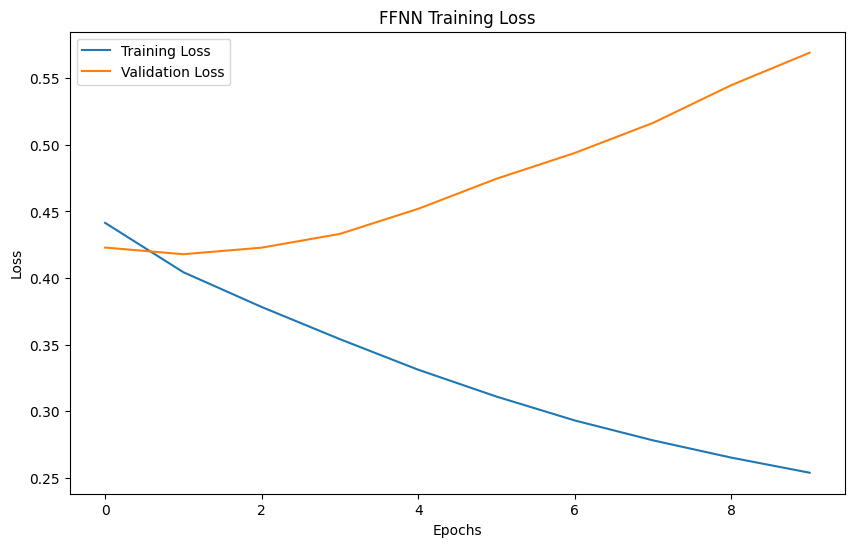

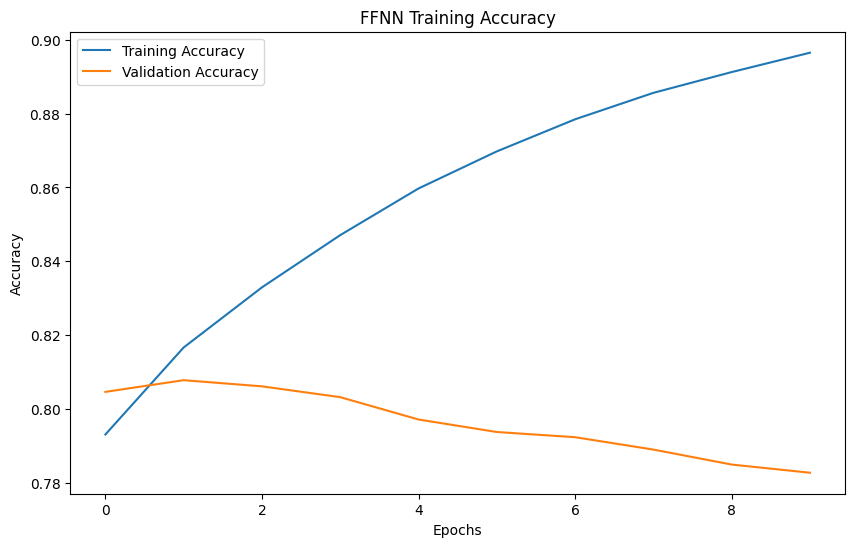

In [42]:
# Plot training loss
plt.figure(figsize=(10, 6))
plt.plot(ffnn_history.history['loss'], label='Training Loss')
plt.plot(ffnn_history.history['val_loss'], label='Validation Loss')
plt.title('FFNN Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training accuracy
plt.figure(figsize=(10, 6))
plt.plot(ffnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(ffnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('FFNN Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### 7. Graphical User Interface (GUI):

In [47]:
import tkinter as tk
from tkinter import messagebox
from keras.preprocessing.sequence import pad_sequences

# Function to preprocess input text
def preprocess_input(text):
    processed_text = preprocess_text(text)  # Assuming preprocess_text function is defined earlier
    sequence = tfidf_vectorizer.transform([processed_text])
    return sequence

# Function to predict sentiment
def predict_sentiment():
    input_text = entry.get()
    if not input_text:
        messagebox.showerror("Error", "Please enter a sentence.")
        return
    sequence = preprocess_input(input_text)
    # Make prediction using the FFNN model
    prediction = ffnn_model.predict(sequence)
    # Interpret prediction
    if prediction[0][0] >= 0.5:
        sentiment = "Positive"
    else:
        sentiment = "Negative"
    messagebox.showinfo("Sentiment Prediction", f"The sentiment of the input sentence is: {sentiment}")

# Create main application window
root = tk.Tk()
root.title("Sentiment Analysis")
root.geometry("400x150")

# Create entry widget for user input
label = tk.Label(root, text="Enter a sentence:")
label.pack()
entry = tk.Entry(root, width=50)
entry.pack()

# Create predict button
predict_button = tk.Button(root, text="Predict Sentiment", command=predict_sentiment)
predict_button.pack()

# Run the GUI
root.mainloop()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
